In [1]:
# Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.
# 1. Capomulin is the best treatment among others, shows reduced tumor volume, less metastatic spread, and high survival rate
# 2. Infubinol shows less metatstic spread and lower tumor volume than Ketapril and Placebo, not significantly, but surviving rate is very low.
# 3. However, both Ketapril and Infubinol show inefficiency as Placebo

In [2]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [3]:
# %matplotlib notebook

In [4]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# import and read csv
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# merge two data
mouse_clinical = pd.merge(clinical_df, mouse_df, on = "Mouse ID", how = "left")

# sort values
mouse_clinical = mouse_clinical.sort_values(["Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])

# display data tablel for preview
mouse_clinical = mouse_clinical[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]

mouse_clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# tumor_volume_mean = mouse_clinical.groupby(["Drug", "Timepoint"]).mean()
# tumor_volume_mean = mouse_clinical.groupby(["Drug", "Timepoint"])["Tumor Volume(mm3)"].mean()
# tumor_volume_mean = mouse_clinical.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_volume_mean = mouse_clinical.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor_volume_mean_df = tumor_volume_mean.mean()

# Convert to DataFrame
tumor_volume_mean_df = tumor_volume_mean_df.reset_index()

# Preview DataFrame
tumor_volume_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [6]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = mouse_clinical.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
tumor_volume_sem_df = tumor_volume_sem.sem()

# Convert to DataFrame
tumor_volume_sem_df = tumor_volume_sem_df.reset_index()

# Preview DataFrame
tumor_volume_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
 # Minor Data Munging to Re-Format the Data Frames
# data_munging = tumor_volume_mean_df.set_index(["Drug", "Timepoint", "Tumor Volume (mm3)"], drop = True).unstack("Drug")
data_munging = tumor_volume_mean_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")

data_munging_sem = tumor_volume_sem_df.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")

# Preview that Reformatting worked
# tumor_volume_sem_df
data_munging.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


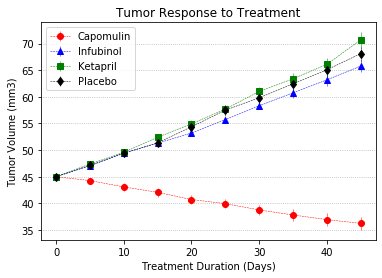

<Figure size 432x288 with 0 Axes>

In [25]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
plt.errorbar(data_munging.index, data_munging["Capomulin"], yerr = data_munging_sem["Capomulin"],
             color = "r", marker = 'o', linestyle = '--', linewidth = 0.5)

plt.errorbar(data_munging.index, data_munging["Infubinol"], yerr = data_munging_sem["Infubinol"],
             color = 'b', marker = '^', linestyle = '--', linewidth = 0.5)

plt.errorbar(data_munging.index, data_munging["Ketapril"], yerr = data_munging_sem["Ketapril"],
             color = 'g', marker = 's', linestyle = '--', linewidth = 0.5)

plt.errorbar(data_munging.index, data_munging["Placebo"], yerr = data_munging_sem["Placebo"],
             color = 'black', marker = 'd', linestyle = '--', linewidth = 0.5)


# capomulin = plt.errorbar(data_munging.index, data_munging["Capomulin"], yerr = data_munging_sem["Capomulin"],
#              color = "r", marker = 'o', linestyle = '--', linewidth = 1, label = "Capomulin")

# infubinol = plt.errorbar(data_munging.index, data_munging["Infubinol"], yerr = data_munging_sem["Infubinol"],
#              color = 'b', marker = '^', linestyle = '--', linewidth = 1, label = "Infubinol")

# ketapril = plt.errorbar(data_munging.index, data_munging["Ketapril"], yerr = data_munging_sem["Ketapril"],
#              color = 'g', marker = 's', linestyle = '--', linewidth = 1, label = "Ketapril")

# placebo = plt.errorbar(data_munging.index, data_munging["Placebo"], yerr = data_munging_sem["Placebo"],
#              color = 'black', marker = 'd', linestyle = '--', linewidth = 1, label = "Placebo")



# Chart title, xlabel, ylabel, legend, xlim, ylim
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "best")

# plt.legend()
ax = plt.axes()
ax.yaxis.grid(linestyle = "dotted")
# plt.grid()

# plt.set_xlim = (-5, 4)
# plt.set_ylim = (35, 75)

plt.show()
# plt.plot()
# plt.fig()

# Save the Figure
plt.savefig("TumorResponse.png")

In [10]:
#Metastatic Response to Treatment
#Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# metastatic_response = mouse_clinical.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
metastatic_response = mouse_clinical.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

metastatic_means = metastatic_response.groupby(["Drug", "Timepoint"]).mean()

metastatic_means.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = mouse_clinical.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
metastatic_sem_df = metastatic_sem.sem()

# Convert to DataFrame
metastatic_sem_df = metastatic_sem_df.reset_index()

# Preview DataFrame
metastatic_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
 # Minor Data Munging to Re-Format the Data Frames
data_munging_meta = metastatic_means.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
data_munding_meta_sem = metastatic_sem_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")

# Preview that Reformatting worked
data_munging_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


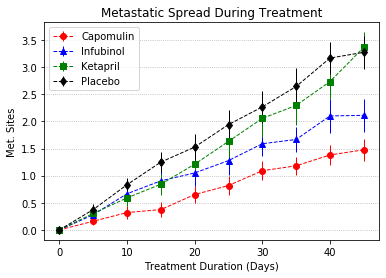

<Figure size 432x288 with 0 Axes>

In [26]:
# Generate the Plot (with Error Bars)
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
plt.errorbar(data_munging_meta.index, data_munging_meta["Capomulin"], yerr = data_munding_meta_sem["Capomulin"],
             color = "r", marker = 'o', linestyle = '--', linewidth = 1)

plt.errorbar(data_munging_meta.index, data_munging_meta["Infubinol"], yerr = data_munding_meta_sem["Infubinol"],
             color = 'b', marker = '^', linestyle = '--', linewidth = 1)

plt.errorbar(data_munging_meta.index, data_munging_meta["Ketapril"], yerr = data_munding_meta_sem["Ketapril"],
             color = 'g', marker = 's', linestyle = '--', linewidth = 1)

plt.errorbar(data_munging_meta.index, data_munging_meta["Placebo"], yerr = data_munding_meta_sem["Placebo"],
             color = 'black', marker = 'd', linestyle = '--', linewidth = 1)

# Chart title, xlabel, ylabel, legend, xlim, ylim
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# plt.legend(loc = "upper left")

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "best")

# plt.grid(alpha = 0.5)
ax = plt.axes()
ax.yaxis.grid(linestyle = "dotted")

plt.set_xlim = (-5, 45)
plt.set_ylim = (-0.5, 4)

plt.show()

# Save the Figure
plt.savefig("MetastaticSpread.png")

In [14]:
# Subset the data to be grouped by Drug and Timepoint and take a count of Mouse ID to find overal survival

# count_mouse = mouse_clinical.loc[:,["Timepoint", "Drug", "Mouse ID"]]
count_mouse = mouse_clinical.groupby(["Drug", "Timepoint"])

count_mouse_df = count_mouse[["Mouse ID"]].count().rename(columns={"Mouse ID": "Mouse Count"})

count_mouse_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
 # Minor Data Munging to Re-Format the Data Frames
data_munging_mouse = count_mouse_df.pivot_table("Mouse Count", ["Timepoint"], "Drug")

# Preview that Reformatting worked
data_munging_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


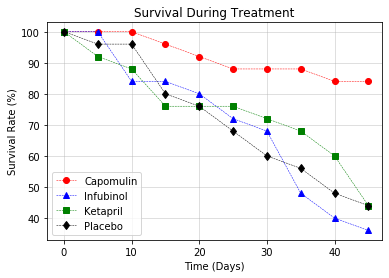

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(np.arange(0, 50, 5), (count_mouse_df.loc["Capomulin", "Mouse Count"]/25) * 100,
         color = "r", marker = 'o', label = "Capomulin", linestyle ='--', linewidth = 0.5)
plt.plot(np.arange(0, 50, 5), (count_mouse_df.loc["Infubinol", "Mouse Count"]/25) * 100,
         color = "b", marker = '^', label = "Infubinol", linestyle = '--', linewidth = 0.5)
plt.plot(np.arange(0, 50, 5), (count_mouse_df.loc["Ketapril", "Mouse Count"]/25) * 100,
         color = "g", marker = 's', label = "Ketapril", linestyle ='--', linewidth = 0.5)
plt.plot(np.arange(0, 50, 5), (count_mouse_df.loc["Placebo", "Mouse Count"]/25) * 100,
         color = "black", marker = 'd', label = "Placebo", linestyle ='--', linewidth = 0.5)

# Add gridlines
plt.grid(alpha = 0.5)

# Chart title, xlabel, ylabel, legend, xlim, ylim
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc = "lower left")

# Add x limits and y limits
plt.xlim(-2.5,47)
plt.ylim(33,103)

# Plot the graph
plt.show()

# Save the Figure
plt.savefig("SurvivalDuring.png")

In [17]:
percent_change = ((data_munging.loc[45, :] - data_munging.loc[0, :]) / data_munging.loc[0, :]) * 100
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

NameError: name 'autolabel' is not defined

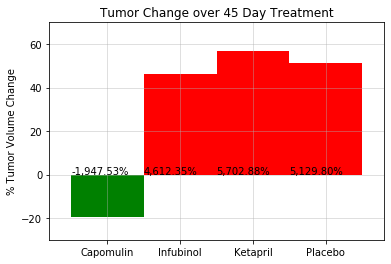

In [40]:
 # Store all Relevant Percent Changes into a Tuple
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

fig, ax = plt.subplots()
x_axis = np.arange(0, 4)
percent_drugs = [percent_change["Capomulin"], percent_change["Infubinol"], percent_change["Ketapril"], percent_change["Placebo"]]

colors = []

# Splice the data between passing and failing drugs
for percent in percent_drugs:
    if percent >= 0:
        colors.append("r")
    else:
        colors.append("g")

barplot = ax.bar(x_axis, percent_drugs, width = 1, align = "center", color = colors,
                 linewidth = 1, tick_label = drugs)



# plt.text(percent, i, str(np.round(pc, 1)) + '%', ha='center', color = "w")

# Orient widths. Add labels, tick marks, etc.
ax.set_title("Tumor Change over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(alpha = 0.5)
ax.set_xlim(-0.8, 3.8)
ax.set_ylim(-30, 70)

for p in barplot:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:,.2%}'.format(height), (x, y))


# Add labels for the percentages
autolabel(barplot, ax)

fig.show()

# Save the Figure
plt.savefig("TumorChange.png")